In [83]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sa
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.factorplots import interaction_plot
!pip install bioinfokit


from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *

!pip install pingouin
!pip install dfply

In [84]:
#Read pdf
df = pd.read_csv("/home/jovyan/INF2178/diabetes (2).csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [85]:
#drop columns
to_drop = ['Pregnancies', 'Glucose', 'DiabetesPedigreeFunction', 'BloodPressure', 'Insulin','Outcome']
df.drop (columns= to_drop, inplace=True, axis= 1)
df.head()

SkinThickness   BMI  Age
0             35  33.6   50
1             29  26.6   31
2              0  23.3   32
3             23  28.1   21
4             35  43.1   33

In [86]:
#Checking for null values
df.isnull().sum()

SkinThickness    0
BMI              0
Age              0
dtype: int64

In [87]:
df.describe()

SkinThickness         BMI         Age
count     768.000000  768.000000  768.000000
mean       20.536458   31.992578   33.240885
std        15.952218    7.884160   11.760232
min         0.000000    0.000000   21.000000
25%         0.000000   27.300000   24.000000
50%        23.000000   32.000000   29.000000
75%        32.000000   36.600000   41.000000
max        99.000000   67.100000   81.000000

# Histograms


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

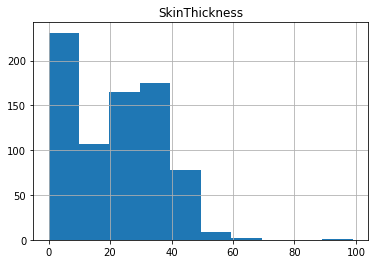

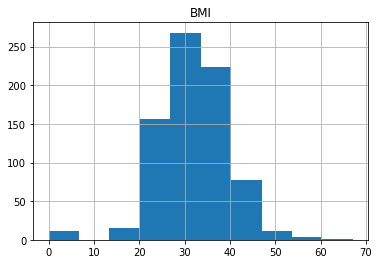

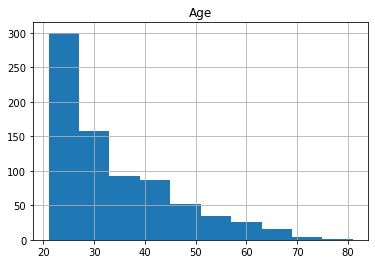

In [88]:
#Creating histograms to see the distribution of our data
df.hist(column='SkinThickness')
df.hist(column='BMI')
df.hist(column='Age')

# Boxplots

<AxesSubplot:>

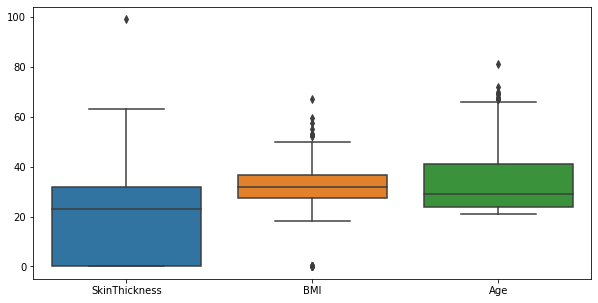

In [89]:
#Creating boxplots to determine which measure of central tendency to replace "0" with in the dataset
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data = df)

In [90]:
#Replacing the 0s to NaN so its easier to change
df[['SkinThickness', 'BMI']] = df[['SkinThickness', 'BMI']].replace(0, np.nan)

In [91]:
#Replacing NaN to Median for SkinThickness and mean BMI

df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

# Pair Plots 

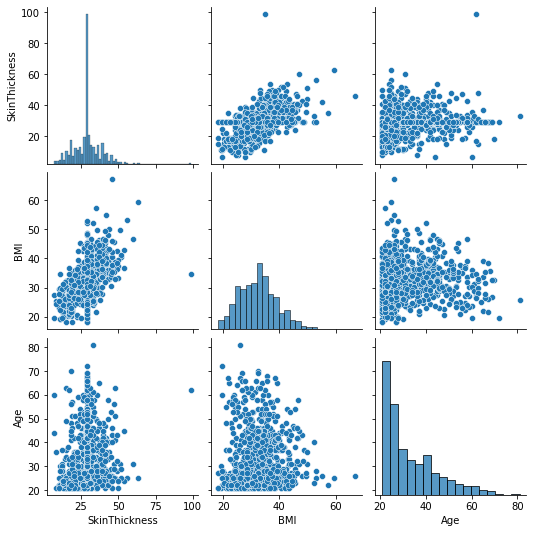

In [92]:
sns.pairplot(df)

# Heatmap

<AxesSubplot:>

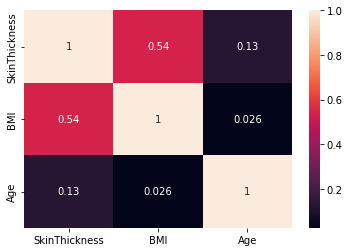

In [93]:
sns.heatmap(df.corr(), annot=True)

In [94]:
#Grouping Age and BMI into categories

#Age groups (https://www.statcan.gc.ca/en/concepts/definitions/age2, extending Youth to include upto 30)
def age_group(row):
    if 18 <= row ['Age'] <= 30:
        return "Young Adult"
    elif 30 < row ['Age'] < 65:
        return "Adult"
    elif row ['Age'] > 65:
        return "Senior"
    else:
        pass
    
    
#BMI groups (https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/#:~:text=BMI%20ranges&text=below%2018.5%20%E2%80%93%20you're%20in,re%20in%20the%20obese%20range)
def bmi_group(row):
    if row ['BMI'] <  18.5:
        return "Underweight"
    elif 18.5 <= row ['BMI'] < 24.9:
        return "Healthy Weight"
    elif 25 <= row ['BMI'] < 29.9:
        return "Overweight"
    elif 30 <= row ['BMI'] < 39.9:
        return "Obese"
    else:
        pass

In [95]:
df['AgeGroup'] = df.apply(age_group, axis = 1)
df['BMIGroup'] = df.apply(bmi_group, axis=1) 

# BoxPlots

<AxesSubplot:xlabel='AgeGroup', ylabel='SkinThickness'>

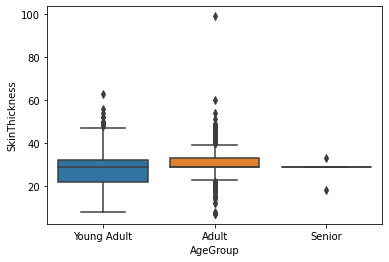

In [96]:
sns.boxplot (x="AgeGroup", y= "SkinThickness", data=df, order =['Young Adult', 'Adult', 'Senior'])

<AxesSubplot:xlabel='BMIGroup', ylabel='SkinThickness'>

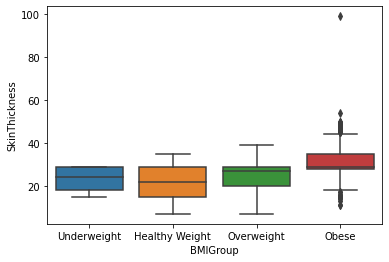

In [97]:
sns.boxplot (x="BMIGroup", y= "SkinThickness", data=df, order =['Underweight', 'Healthy Weight', 'Overweight', 'Obese'])

# T-Tests

In [98]:
#T-Test

tstat, pval = stats.ttest_ind(df['SkinThickness'], df['BMI'])
print ("Skin Thickness and BMI")
print("The T statistic is:", tstat , "P-value", pval)

tstat, pval = stats.ttest_ind(df['SkinThickness'], df['Age'])
print ("Skin Thickness and Age")
print("The T statistic is:", tstat , "P-value", pval)

tstat, pval = stats.ttest_ind(df['Age'], df['BMI'])
print ("Age and BMI")
print("The T statistic is:", tstat , "P-value", pval)

Skin Thickness and BMI
The T statistic is: -8.317041249342727 P-value 1.9655062510875946e-16
Skin Thickness and Age
The T statistic is: -7.80033766753409 P-value 1.1330910337718397e-14
Age and BMI
The T statistic is: 1.593754661464632 P-value 0.11119700266449711


# One Way ANOVA

In [99]:
#One Way ANOVA
model = ols ('SkinThickness~BMIGroup', data = df).fit()

aov = sa.stats.anova_lm(model, type=2)
aov

df        sum_sq      mean_sq          F        PR(>F)
BMIGroup    3.0   8535.971005  2845.323668  49.818277  5.090140e-29
Residual  657.0  37523.932172    57.114052        NaN           NaN

In [100]:
#One Way ANOVA
model = ols ('SkinThickness~AgeGroup', data = df).fit()

aov = sa.stats.anova_lm(model, type=2)
aov

df        sum_sq     mean_sq         F    PR(>F)
AgeGroup    2.0   1045.031143  522.515572  6.844639  0.001132
Residual  762.0  58170.615915   76.339391       NaN       NaN

# Two-way ANOVA

In [101]:
#Two Way ANOVA

model2 = ols ('SkinThickness~AgeGroup+BMIGroup', data = df).fit()

aov1 = sa.stats.anova_lm(model2, type=2)
aov1

df        sum_sq      mean_sq          F        PR(>F)
AgeGroup    2.0   1766.294601   883.147300  15.787204  2.016262e-07
BMIGroup    3.0   7737.353067  2579.117689  46.104492  4.969456e-27
Residual  652.0  36473.338654    55.940703        NaN           NaN

# TuKey Range Test - Post hoc test

In [102]:
#Post-hoc test - Tukey Range test

from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df, res_var='SkinThickness', anova_model = 'SkinThickness ~ AgeGroup + BMIGroup + AgeGroup:BMIGroup' )
res.anova_summary

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5



df        sum_sq      mean_sq          F        PR(>F)
AgeGroup             2.0   1905.829623   952.914812  17.188785  3.834281e-05
BMIGroup             3.0  11589.456686  3863.152229  69.683978  3.878961e-28
AgeGroup:BMIGroup    6.0    672.543663   112.090610   2.021903  7.370186e-02
Residual           648.0  35923.934212    55.438170        NaN           NaN

In [103]:
res = stat()
res.tukey_hsd(df=df, res_var='SkinThickness', xfac_var='AgeGroup', anova_model='SkinThickness ~ AgeGroup + BMIGroup')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1       group2      Diff     Lower     Upper   q-value   p-value
0        Adult  Young Adult  3.327166  1.935066  4.719266  7.940139  0.001000
1        Adult       Senior  1.371214 -3.610984  6.353412  0.914341  0.773992
2  Young Adult       Senior  1.955952 -3.004791  6.916695  1.309892  0.613973

In [104]:
res = stat()
res.tukey_hsd(df=df, res_var='SkinThickness', xfac_var='BMIGroup', anova_model='SkinThickness ~ AgeGroup + BMIGroup')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1          group2      Diff     Lower      Upper    q-value  \
0           Obese      Overweight  6.055808  4.292413   7.819202  12.509347   
1           Obese  Healthy Weight  8.826842  6.661683  10.992002  14.850038   
2           Obese     Underweight  7.986842 -1.696046  17.669730   3.004570   
3      Overweight  Healthy Weight  2.771034  0.353561   5.188508   4.175344   
4      Overweight     Underweight  1.931034 -7.811377  11.673446   0.721997   
5  Healthy Weight     Underweight  0.840000 -8.983082  10.663082   0.311490   

    p-value  
0  0.001000  
1  0.001000  
2  0.146362  
3  0.017175  
4  0.900000  
5  0.900000

# Multiple Linear Regression

In [105]:
#Running a Multiple Linear Regression 
from sklearn.model_selection import train_test_split

X = df[['Age', 'BMI']]
y = df['SkinThickness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [106]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

4.130124941075305
[0.07682462 0.68983007]


In [107]:
#Making predictions
y_pred = regressor.predict(X_test)

In [108]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

Actual  Predicted
661    43.0  35.413977
122    30.0  29.075382
113    29.0  29.504963
14     19.0  25.845797
529    29.0  23.481508
..      ...        ...
476    45.0  29.605312
482    22.0  25.458490
230    29.0  36.172790
527    15.0  24.116447
380    30.0  27.220682

[154 rows x 2 columns]

In [109]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Age     0.076825
BMI     0.689830

In [110]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.6861549029432386
Mean Squared Error: 51.45815517085916
Root Mean Squared Error: 7.173433987349375


# ANCOVA

In [111]:
from pingouin import ancova
import pingouin as pg

#Running ANCOVA while controlling for Age
ancova(data=df, dv= 'SkinThickness', covar = 'Age', between= 'BMIGroup')

Source            SS   DF          F         p-unc       np2
0  BMIGroup   7921.941359    3  47.728597  6.553952e-28  0.179165
1       Age   1229.873105    1  22.229444  2.956636e-06  0.032776
2  Residual  36294.059067  656        NaN           NaN       NaN

In [112]:
#Running ANCOVA while controlling for BMI 
ancova(data=df, dv= 'SkinThickness', covar = 'BMI', between= 'AgeGroup')

Source            SS   DF           F         p-unc       np2
0  AgeGroup    507.427194    2    4.684214  9.508056e-03  0.012161
1       BMI  16952.167231    1  312.981193  6.310992e-59  0.291421
2  Residual  41218.448684  761         NaN           NaN       NaN

In [113]:
post1 = pg.pairwise_tukey(dv='SkinThickness', between='BMI', data = df, effsize = 'cohen')

post1

A     B  mean(A)  mean(B)  diff         se         T   p-tukey  \
0      18.2  18.4     21.0     29.0  -8.0   8.525244 -0.938390  1.000000   
1      18.2  19.1     21.0     29.0  -8.0   8.525244 -0.938390  1.000000   
2      18.2  19.3     21.0     11.0  10.0   8.525244  1.172987  1.000000   
3      18.2  19.4     21.0     11.0  10.0   8.525244  1.172987  1.000000   
4      18.2  19.5     21.0     18.5   2.5   6.739797  0.370931  1.000000   
...     ...   ...      ...      ...   ...        ...       ...       ...   
30623  55.0  59.4     42.0     63.0 -21.0  10.441248 -2.011254  1.000000   
30624  55.0  67.1     42.0     46.0  -4.0  10.441248 -0.383096  1.000000   
30625  57.3  59.4     35.0     63.0 -28.0  10.441248 -2.681672  0.999991   
30626  57.3  67.1     35.0     46.0 -11.0  10.441248 -1.053514  1.000000   
30627  59.4  67.1     63.0     46.0  17.0  10.441248  1.628158  1.000000   

          cohen  
0     -1.083559  
1     -1.083559  
2      1.354449  
3      1.354449  
4      0.338612  
...         ...  
30623 -2.844342  
30624 -0.541779  
30625 -3.792456  
30626 -1.489894  
30627  2.302563  

[30628 rows x 9 columns]

In [114]:
post2 = pg.pairwise_tukey(dv='SkinThickness', between='BMIGroup', data = df, effsize = 'cohen')

post2

A            B    mean(A)    mean(B)      diff        se  \
0  Healthy Weight        Obese  22.227723  30.997382 -8.769659  0.845576   
1  Healthy Weight   Overweight  22.227723  24.931034 -2.703312  0.945372   
2  Healthy Weight  Underweight  22.227723  23.000000 -0.772277  3.852791   
3           Obese   Overweight  30.997382  24.931034  6.066348  0.691198   
4           Obese  Underweight  30.997382  23.000000  7.997382  3.798424   
5      Overweight  Underweight  24.931034  23.000000  1.931034  3.821878   

           T       p-tukey     cohen  
0 -10.371225  3.580469e-13 -1.160409  
1  -2.859523  2.266315e-02 -0.357705  
2  -0.200446  9.971475e-01 -0.102188  
3   8.776568  3.582690e-13  0.802705  
4   2.105447  1.523929e-01  1.058221  
5   0.505258  9.578291e-01  0.255516

In [115]:
post3 = pg.pairwise_ttests(data=df, dv='SkinThickness', between='BMIGroup',
                             parametric=True, padjust='bonf', effsize='cohen', alpha = 0.05)
post3

Contrast               A            B  Paired  Parametric          T  \
0  BMIGroup  Healthy Weight        Obese   False        True -10.502860   
1  BMIGroup  Healthy Weight   Overweight   False        True  -3.073201   
2  BMIGroup  Healthy Weight  Underweight   False        True  -0.212606   
3  BMIGroup           Obese   Overweight   False        True   9.414971   
4  BMIGroup           Obese  Underweight   False        True   2.232203   
5  BMIGroup      Overweight  Underweight   False        True   0.537383   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  169.837808   two-sided  3.368874e-20  2.021324e-19     bonf  1.388e+20   
1  190.905444   two-sided  2.427622e-03  1.456573e-02     bonf     11.458   
2    3.255098   two-sided  8.442618e-01  1.000000e+00     bonf      0.439   
3  405.879304   two-sided  3.599589e-19  2.159753e-18     bonf  3.237e+16   
4    3.080722   two-sided  1.094333e-01  6.565998e-01     bonf      2.379   
5    3.117575   two-sided  6.270014e-01  1.000000e+00     bonf      0.473   

      cohen  
0 -1.110980  
1 -0.395834  
2 -0.105841  
3  0.797691  
4  0.995329  
5  0.294769

# Power Analysis


In [116]:
#Analysis with 20% power

effect_size = 0.2 #small effect size
alpha = 0.05 #confidence 95%
power = 0.2 #power 20%
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
 power = power,
 alpha = alpha)
print('The sample size needed for (Effect Size: 0.2, Power: 20%) {0:.2f}'.format(sample_size))

effect_size = 0.5 #med effect size
alpha = 0.05 #confidence 95%
power = 0.2 #power 20%
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
 power = power,
 alpha = alpha)
print('The sample size needed for (Effect Size: 0.5, Power: 20%) {0:.2f}'.format(sample_size))

effect_size = 0.8 #large effect size
alpha = 0.1 #confidence 90%
power = 0.2 #power 20%
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
 power = power,
 alpha = alpha)
print('The sample size needed for (Effect Size: 0.8, Power: 20%) {0:.2f}'.format(sample_size))

The sample size needed for (Effect Size: 0.2, Power: 20%) 63.08
The sample size needed for (Effect Size: 0.5, Power: 20%) 10.96
The sample size needed for (Effect Size: 0.8, Power: 20%) 2.80


In [128]:
#Analysis with 50% power

effect_size = 0.2 #small effect size
alpha = 0.05 #confidence 95%
power = 0.5 #power 50%
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
 power = power,
 alpha = alpha)
print('The sample size needed for (Effect Size: 0.2, Power: 50%) {0:.2f}'.format(sample_size))

effect_size = 0.5 #med effect size
alpha = 0.05 #confidence 95%
power = 0.5 #power 50%
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
 power = power,
 alpha = alpha)
print('The sample size needed for (Effect Size: 0.5, Power: 50%) {0:.2f}'.format(sample_size))

effect_size = 0.8 #large effect size
alpha = 0.05 #confidence 95%
power = 0.5 #power 50%
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
 power = power,
 alpha = alpha)
print('The sample size needed for (Effect Size: 0.5, Power: 50%, alpha: 0.05) {0:.2f}'.format(sample_size))

effect_size = 0.8 #large effect size
alpha = 0.1 #confidence 90%
power = 0.5 #power 50%
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
 power = power,
 alpha = alpha)
print('The sample size needed for (Effect Size: 0.8, Power: 50%, alpha: 0.10) {0:.2f}'.format(sample_size))


The sample size needed for (Effect Size: 0.2, Power: 50%) 193.02
The sample size needed for (Effect Size: 0.5, Power: 50%) 31.71
The sample size needed for (Effect Size: 0.5, Power: 50%, alpha: 0.05) 13.03
The sample size needed for (Effect Size: 0.8, Power: 50%, alpha: 0.10) 9.19


In [129]:
#Power analysis with 80% power

effect_size = 0.2 #small effect size
alpha = 0.05 #confidence 95%
power = 0.8 #power 80%
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
 power = power,
 alpha = alpha)
print('The sample size needed for (Effect Size: 0.2, Power: 80%) {0:.2f}'.format(sample_size))

effect_size = 0.5 #medium effect size
alpha = 0.05 #confidence 95%
power = 0.8 #power 80%
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
 power = power,
 alpha = alpha)
print('The sample size needed for (Effect Size: 0.5, Power: 80%): {0:.2f}'.format(sample_size))

effect_size = 0.8 #large effect size
alpha = 0.05 #confidence 95%
power = 0.8 #power 80%
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
 power = power,
 alpha = alpha)
print('The sample size needed for (Effect Size: 0.8, Power: 80%, alpha: 0.05) {0:.2f}'.format(sample_size))

effect_size = 0.8 #large effect size
alpha = 0.1 #confidence 90%
power = 0.8 #power 80%
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size,
 power = power,
 alpha = alpha)
print('The sample size needed for (Effect Size: 0.8, Power: 80%, alpha: 0.1): {0:.2f}'.format(sample_size))

The sample size needed for (Effect Size: 0.2, Power: 80%) 393.41
The sample size needed for (Effect Size: 0.5, Power: 80%): 63.77
The sample size needed for (Effect Size: 0.8, Power: 80%, alpha: 0.05) 25.52
The sample size needed for (Effect Size: 0.8, Power: 80%, alpha: 0.1): 20.03


In [165]:
from statsmodels.stats.power import TTestPower

actual_power = TTestIndPower()
pow1 = actual_power.solve_power(nobs1= 768, effect_size=0.8,
                        power=None, alpha=0.05)

print ('The statistical power of this sample given an effect size of 0.8 is:', pow1)

The statistical power of this sample given an effect size of 0.8 is: 1.0


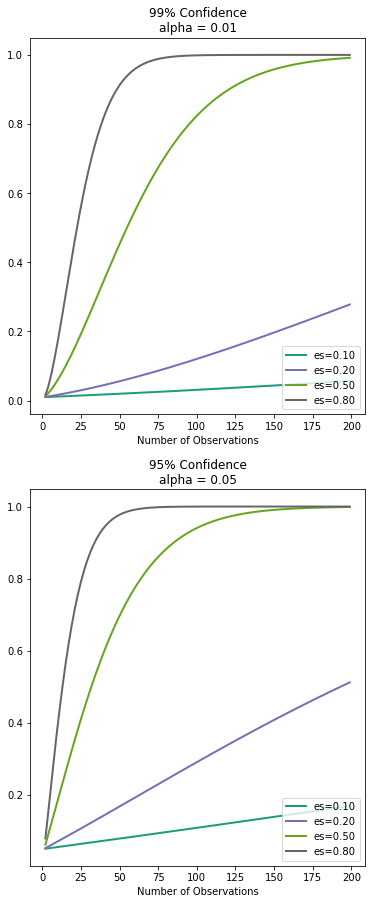

In [140]:
#Visualization of Power Analysis
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var = 'nobs',
 nobs = np.arange(2,200),
 effect_size=np.array([0.10,0.2,0.5,0.8]),
 alpha=0.01,
 ax=ax, title="99% Confidence" + '\n' + 'alpha = 0.01')


ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var = 'nobs',
 nobs = np.arange(2,200),
 effect_size=np.array([0.10,0.2,0.5,0.8]),
 alpha=0.05,
 ax=ax, title="95% Confidence" + '\n' + 'alpha = 0.05')
fig.subplots_adjust(top=3)
